In [2]:
MAIN_PATH = "/home/carlos/MasterDS/tfm"
JSON_DATA_PATH = '{}/data/json/'.format(MAIN_PATH)
CSV_DATA_PATH = '{}/data/csv/'.format(MAIN_PATH)

In [3]:
import sys
sys.path.insert(0, MAIN_PATH)

In [4]:
%load_ext autoreload
%autoreload 2
from scripts.metrics.summary_evaluation import SummaryEvaluation
from scripts.models.rank_with_model.rank_with_model import RankModel
from scripts.models.baseline_rank.baseline_rank import BaselineRank
from scripts.models.ltr.train import LTRTrain
from scripts.extractive_summary.ltr.ltr_features_targets import LTRFeaturesTargets
from scripts.models.ltr_gbt.train import LTRGBTTrain
from scripts.models.ltr_svm_tf.train import LTRSVMTFTrain
from scripts.models.ltr_nn_tf.train import LTRNNTFTrain
from scripts.models.rank_with_model.metrics import RankModelMetrics
from scripts import conf
%reload_ext autoreload

In [5]:
import pandas as pd

# Evaluación de ranking

# Random forest

## Carga de datos

In [6]:
ltr_params = {
    'key_events': ['goal', 'red_card', 'penalty'],
    'lags': [1, 3, 5],
    'target_metric': 'cosine_emb',
    'drop_teams': True,
    'lemma': True,
    'metric_params': {'embedding': 'roberta-base-nli-stsb-mean-tokens',
                     'text_process': 'basic'},
    'count_vec_kwargs': {'ngram_range': (1, 2), 'strip_accents': 'unicode'}
}
num_features = ['tfidf_sum']
cat_features_dict = {'is_key_event': [0, 1],
                     'n_players_cat': ['no_player', 'one_player', 'more_than_one_player']}

# Uncomment if using cv

model_params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [2, 5, 7],
    'bootstrap': [True],
    
}
cv = 5
opt_metric = 'neg_mean_squared_error'
ltr_train = LTRTrain(cat_features_dict=cat_features_dict, num_features=num_features,
                     model_params=model_params, ltr_params=ltr_params,
                    cv=cv, opt_metric=opt_metric)


Setting target metric to cosine_emb


In [55]:
ltr_train = LTRTrain(cat_features_dict=cat_features_dict, num_features=num_features,
                     model_params=model_params, ltr_params=ltr_params)

Setting target metric to rouge


In [7]:
#CV
ltr_train = LTRTrain(cat_features_dict=cat_features_dict,
                     num_features=num_features,
                     model_params=model_params, ltr_params=ltr_params,
                    cv=cv, opt_metric=opt_metric)

Setting target metric to cosine_emb


In [10]:
ltr_train.experiment_id()

'459c57fcf1'

In [8]:
rank_model = RankModel(ltr_train, n=10)

Model already trained


## Evaluación

In [9]:
rank_metrics = RankModelMetrics(rank_model)

In [10]:
avg_ndcg = rank_metrics.get_metrics()

In [11]:
avg_ndcg

0.8696006108476068

# GBT

## Carga de datos

In [12]:
ltr_params = {
    'key_events': ['goal', 'red_card', 'penalty'],
    'lags': [1, 3, 5],
    'target_metric': 'cosine_emb',
    'drop_teams': True,
    'lemma': True,
    'metric_params': {'embedding': 'roberta-base-nli-stsb-mean-tokens',
                     'text_process': 'basic'},
    'count_vec_kwargs': {'ngram_range': (1, 2), 'strip_accents': 'unicode'}
}
cat_features_dict = {'is_key_event': [0, 1]}
num_features = ['tfidf_sum']

model_params = {
    'min_samples_leaf': [50],
    'subsample': [0.8],  
    'learning_rate': [0.1],
    'n_estimators': [80],
    'max_depth':[7],
    'min_samples_split': [600],
}
cv = 5
opt_metric = 'neg_mean_squared_error'

In [13]:
ltr_train = LTRGBTTrain(cat_features_dict=cat_features_dict, num_features=num_features,
                     model_params=model_params, ltr_params=ltr_params,
                    cv=cv, opt_metric=opt_metric)

Setting target metric to cosine_emb


In [14]:
ltr_train.experiment_id()

'fca8c8bb80'

In [14]:
rank_model = RankModel(ltr_train, n=10)

Model already trained


In [17]:
rank_model.path

'/home/carlos/MasterDS/tfm/models/rank_with_model/77752e3840'

## Evaluación

## Evaluación

In [15]:
rank_metrics = RankModelMetrics(rank_model)

In [16]:
avg_ndcg = rank_metrics.get_metrics()

Categorizing n_players...
Computing new length...
Dropping {'position', 'event_ix', 'equalize', 'players_importance', 'n_stop', 'length', 'sim_previous_5', 'total_length', 'score', 'sentence_ix', 'sim_previous_3', 'n_players_cat', 'url', 'n_players', 'sim_previous_1', 'json_file', 'advantage'}
Reading targets from /home/carlos/MasterDS/tfm/data/ltr/targets/819812546b/targets.csv


  9%|▊         | 388/4523 [00:08<01:34, 43.74it/s]/home/carlos/MasterDS/tfm/scripts/models/rank_with_model/metrics.py:56: UserWarning: This url only has one event, ignoring...
  warnings.warn('This url only has one event, ignoring...')
 14%|█▎        | 616/4523 [00:13<01:18, 49.95it/s]/home/carlos/MasterDS/tfm/scripts/models/rank_with_model/metrics.py:56: UserWarning: This url only has one event, ignoring...
  warnings.warn('This url only has one event, ignoring...')
 16%|█▌        | 713/4523 [00:15<01:15, 50.70it/s]/home/carlos/MasterDS/tfm/scripts/models/rank_with_model/metrics.py:56: UserWarning: This url only has one event, ignoring...
  warnings.warn('This url only has one event, ignoring...')
 20%|██        | 910/4523 [00:19<01:12, 49.87it/s]/home/carlos/MasterDS/tfm/scripts/models/rank_with_model/metrics.py:56: UserWarning: This url only has one event, ignoring...
  warnings.warn('This url only has one event, ignoring...')
 79%|███████▉  | 3577/4523 [01:16<00:22, 41.91it/s]/home

In [17]:
avg_ndcg

0.869108959186533

# SVM

## Carga de datos

In [18]:
ltr_params = {
    'mode': 'tfidf',
    'count_vec_kwargs': {'strip_accents': 'unicode'},
    'target_metric': 'cosine_emb',
    'metric_params': {'embedding': 'roberta-base-nli-stsb-mean-tokens',
                     'text_process': 'basic'},
    'drop_teams': True,
    'lemma': True,
    'train_perc': 0.7,
    'val_perc': 0.2
}

dim_reduction_params = {
    'dim_reduction': 'truncated_svd',
    'dim_reduction_params': {
        'n_components': 20,
        'random_state': 10
    }
}

model_params = {}

In [19]:
ltr_train = LTRSVMTFTrain(model_params=model_params,
                          ltr_params=ltr_params,
                         dim_reduction_params=None)

Setting target metric to cosine_emb
Setting mode to tfidf


In [32]:
ltr_train = LTRSVMTFTrain(model_params=model_params, ltr_params=ltr_params,
                         dim_reduction_params=dim_reduction_params)

Setting target metric to cosine_emb
Setting mode to tfidf
Using truncated_svd for dimensionality reduction


In [20]:
rank_model = RankModel(ltr_train, n=10)

Model already trained


In [34]:
ltr_train.experiment_id()

'4422e10011'

## Evaluación

In [21]:
rank_metrics = RankModelMetrics(rank_model)

In [22]:
avg_ndcg = rank_metrics.get_metrics()

Reading targets from /home/carlos/MasterDS/tfm/data/ltr/targets/819812546b/targets.csv


  9%|▊         | 385/4523 [00:07<01:18, 52.69it/s]/home/carlos/MasterDS/tfm/scripts/models/rank_with_model/metrics.py:56: UserWarning: This url only has one event, ignoring...
  warnings.warn('This url only has one event, ignoring...')
 14%|█▎        | 613/4523 [00:11<01:13, 53.01it/s]/home/carlos/MasterDS/tfm/scripts/models/rank_with_model/metrics.py:56: UserWarning: This url only has one event, ignoring...
  warnings.warn('This url only has one event, ignoring...')
 16%|█▌        | 709/4523 [00:13<01:12, 52.83it/s]/home/carlos/MasterDS/tfm/scripts/models/rank_with_model/metrics.py:56: UserWarning: This url only has one event, ignoring...
  warnings.warn('This url only has one event, ignoring...')
 20%|██        | 907/4523 [00:17<01:07, 53.60it/s]/home/carlos/MasterDS/tfm/scripts/models/rank_with_model/metrics.py:56: UserWarning: This url only has one event, ignoring...
  warnings.warn('This url only has one event, ignoring...')
 79%|███████▉  | 3577/4523 [01:08<00:17, 52.81it/s]/home

In [23]:
avg_ndcg

0.9198286293726916

# NN

## Carga de datos

In [24]:
ltr_params = {
    'mode': 'tfidf',
    'count_vec_kwargs': {'strip_accents': 'unicode'},
    'target_metric': 'cosine_emb',
    'metric_params': {'embedding': 'roberta-base-nli-stsb-mean-tokens',
                     'text_process': 'basic'},
    'drop_teams': True,
    'lemma': True,
    'train_perc': 0.7,
    'val_perc': 0.2
}
DENSE_LAYERS = [125, 60, 20]
N_DROPOUT = 3

model_params = {
    'dense_layers': DENSE_LAYERS,
    'dense_activation': ['relu'] * len(DENSE_LAYERS),
    'dropout': [0.3] * N_DROPOUT,
    'optimizer': 'adam',
}

dim_reduction_params = {
        'dim_reduction': 'truncated_svd',
        'dim_reduction_params': {
            'n_components': 250,
            'random_state': 10
    }
}

opt_metric = 'mean_squared_error'
epochs = 25
batch_size = 128
# Not in config
shuffle = True
max_queue_size = 50

In [25]:
ltr_train = LTRNNTFTrain(ltr_params, epochs=epochs, batch_size=batch_size,
                         model_params=model_params,
                         opt_metric=opt_metric)

Setting target metric to cosine_emb
Setting mode to tfidf
Optimizing mean_squared_error with adam
Epochs: 25
Batch size: 128


In [13]:
ltr_train = LTRNNTFTrain(ltr_params, epochs=epochs, batch_size=batch_size,
                         model_params=model_params,
                         opt_metric=opt_metric, 
                        dim_reduction_params=dim_reduction_params)

Using truncated_svd for dimensionality reduction
Using truncated_svd for dimensionality reduction
Setting target metric to cosine_emb
Setting mode to tfidf
Optimizing mean_squared_error with adam
Epochs: 25
Batch size: 128


In [26]:
rank_model = RankModel(ltr_train, n=10, is_nn=True)

Model already trained


In [41]:
rank_model.path

'/home/carlos/MasterDS/tfm/models/rank_with_model/57e17a45b6'

In [42]:
type(rank_model)

scripts.models.rank_with_model.rank_with_model.RankModel

In [14]:
ltr_train.experiment_id()

'440cde5154'

## Evaluación

In [27]:
rank_metrics = RankModelMetrics(rank_model)

In [28]:
avg_ndcg = rank_metrics.get_metrics()

Reading targets from /home/carlos/MasterDS/tfm/data/ltr/targets/819812546b/targets.csv


  9%|▊         | 388/4523 [00:07<01:18, 52.94it/s]/home/carlos/MasterDS/tfm/scripts/models/rank_with_model/metrics.py:56: UserWarning: This url only has one event, ignoring...
  warnings.warn('This url only has one event, ignoring...')
 14%|█▎        | 616/4523 [00:11<01:16, 51.28it/s]/home/carlos/MasterDS/tfm/scripts/models/rank_with_model/metrics.py:56: UserWarning: This url only has one event, ignoring...
  warnings.warn('This url only has one event, ignoring...')
 16%|█▌        | 712/4523 [00:13<01:11, 53.38it/s]/home/carlos/MasterDS/tfm/scripts/models/rank_with_model/metrics.py:56: UserWarning: This url only has one event, ignoring...
  warnings.warn('This url only has one event, ignoring...')
 20%|██        | 910/4523 [00:17<01:07, 53.63it/s]/home/carlos/MasterDS/tfm/scripts/models/rank_with_model/metrics.py:56: UserWarning: This url only has one event, ignoring...
  warnings.warn('This url only has one event, ignoring...')
 79%|███████▉  | 3576/4523 [01:08<00:18, 52.44it/s]/home

In [29]:
avg_ndcg

0.9166167855009472

## Métricas modelos vs ordenación

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
metrics_dict = {
    'MSE': [0.01475,
0.0147,
0.01475,
0.01366,
0.01995,
0.01989,
0.01948,
0.01836,
0.006887,
0.006924,
0.005833,
0.005589,
0.009057,
0.00913,
0.007152,
0.007072],
    'NDCG@10': [0.6668249673,
0.6670141986,
0.7896433687,
0.757607911,
0.6750373009,
0.6811594792,
0.7880717308,
0.756274068,
0.8401264834,
0.8404661173,
0.8897762351,
0.8960260083,
0.8696006108,
0.8691089592,
0.9198286294,
0.9166167855],
    'Modelo': ['RF', 'GBT', 'SVM', 'NN']*4,
    'Score': ['ROUGE-1']*4 + ['Cosine TF-IDF']*4 + ['Cosine + paraphrase']*4 + ['Cosine + STS']*4
}

In [52]:
metrics_df = pd.DataFrame(metrics_dict)

In [62]:
metrics_df

,MSE,NDCG@10,Modelo,Score
0,0.014750,0.666825,RF,ROUGE-1
1,0.014700,0.667014,GBT,ROUGE-1
2,0.014750,0.789643,SVM,ROUGE-1
3,0.013660,0.757608,NN,ROUGE-1
4,0.019950,0.675037,RF,Cosine TF-IDF
5,0.019890,0.681159,GBT,Cosine TF-IDF
6,0.019480,0.788072,SVM,Cosine TF-IDF
7,0.018360,0.756274,NN,Cosine TF-IDF
8,0.006887,0.840126,RF,Cosine + paraphrase
9,0.006924,0.840466,GBT,Cosine + paraphrase


In [54]:
scores = ['ROUGE-1', 'Cosine TF-IDF', 'Cosine + paraphrase', 'Cosine + STS']

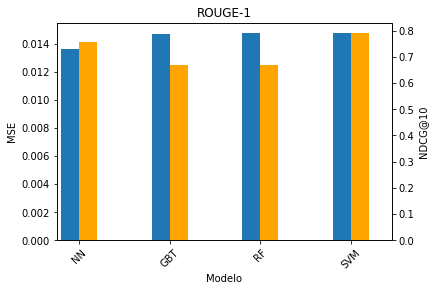

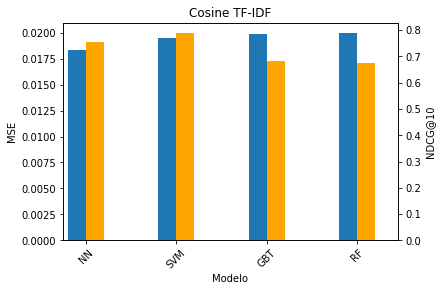

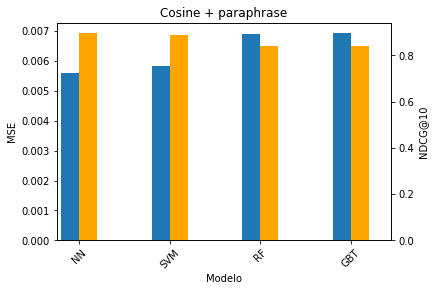

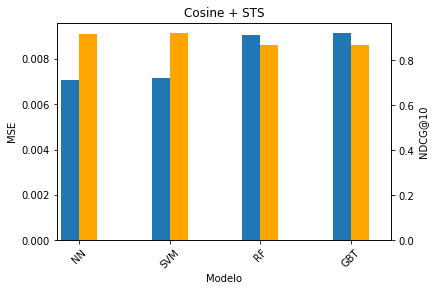

In [71]:
for score in scores:
    score_df = metrics_df[metrics_df.Score == score].sort_values('MSE')
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax1 = ax.twinx()

    width = 0.2

    score_df.plot(kind='bar', x='Modelo', y='MSE', ax=ax, width=width, position=1)
    score_df.plot(kind='bar', x='Modelo', y='NDCG@10', color='orange', ax=ax1, width=width, position=0)

    ax.set_ylabel('MSE')
    ax1.set_ylabel('NDCG@10')
    
    ax.get_legend().remove()
    ax1.get_legend().remove()
    
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    
    plt.title(score)

    plt.show()

<AxesSubplot:xlabel='Modelo'>

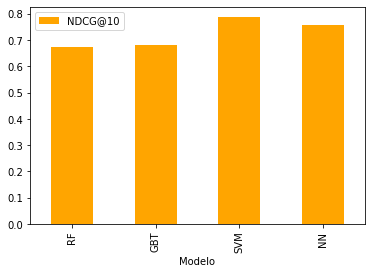

In [74]:
metrics_df[metrics_df.Score=='Cosine TF-IDF'].plot.bar(x='Modelo', y='NDCG@10', color='orange')

# Eventos clave y grafos conceptuales

In [5]:
sms_dict = {
    'sent_emb': 'distilroberta-base-paraphrase-v1'
}

In [6]:
evaluation = SummaryEvaluation(metric='sms', sms_dict=sms_dict)

Setting target metric to sms


In [11]:
%%time
evaluation.evaluate_all_summaries(preprocess_text=True)

Evaluating the following summaries: ['key_events_summaries_1.csv', 'key_events_summaries_3.csv', 'key_events_summaries_4.csv', 'key_events_summaries_graph_2.csv', 'key_events_summaries_graph_3.csv', 'key_events_summaries_2.csv', 'key_events_summaries_graph_5.csv', 'key_events_summaries_graph_1.csv', 'key_events_summaries_graph_4.csv']
Evaluating key_events_summaries_1.csv
Performing evaluation for 4302 articles
Writing to /home/carlos/MasterDS/tfm/data/metrics/summaries/sms/key_events_summaries_1_processed.pickle
Writing avg to /home/carlos/MasterDS/tfm/data/metrics/summaries/sms/key_events_summaries_1_processed_avg.pickle
Evaluating key_events_summaries_3.csv
Performing evaluation for 4302 articles
Writing to /home/carlos/MasterDS/tfm/data/metrics/summaries/sms/key_events_summaries_3_processed.pickle
Writing avg to /home/carlos/MasterDS/tfm/data/metrics/summaries/sms/key_events_summaries_3_processed_avg.pickle
Evaluating key_events_summaries_4.csv
Performing evaluation for 4300 articl

# Todos los resúmenes

In [6]:
sms_dict = {
    'sent_emb': 'distilroberta-base-paraphrase-v1'
}

In [7]:
evaluation = SummaryEvaluation(metric='sms', sms_dict=sms_dict)

Setting target metric to sms


In [8]:
pd_metrics = evaluation.output_avg_metrics()

In [9]:
pd_metrics.sort_values('experiment')

,experiment,score
10,baseline_rank_cosine_tfidf,0.000372
14,baseline_rank_cosine_tfidf_processed,0.000086
0,key_events_summaries_1,0.000399
12,key_events_summaries_2,0.000397
6,key_events_summaries_3,0.000399
5,key_events_summaries_4,0.000397
1,key_events_summaries_graph_1,0.000265
2,key_events_summaries_graph_2,0.000210
3,key_events_summaries_graph_3,0.000265
7,key_events_summaries_graph_4,0.000210


In [10]:
pd_metrics.sort_values('score')

,experiment,score
4,rank_with_model_ltr_random_forest_cosine_emb_1...,0.000068
8,rank_with_model_ltr_gbt_cosine_emb_fca8c8bb80_...,0.000069
14,baseline_rank_cosine_tfidf_processed,0.000086
2,key_events_summaries_graph_2,0.000210
7,key_events_summaries_graph_4,0.000210
11,rank_with_model_ltr_random_forest_cosine_emb_1...,0.000249
9,rank_with_model_ltr_gbt_cosine_emb_fca8c8bb80,0.000250
1,key_events_summaries_graph_1,0.000265
3,key_events_summaries_graph_3,0.000265
13,key_events_summaries_graph_5,0.000271
